## Undersampling


In [1]:
import dataloader as dl # module for loading and pre-processing the data
import models_eval as mev # module for model training and testing
d = dl.load_dataset()
d

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


Total data points:  4898
Percentage of individual target class:
 False    78.358514
True     21.641486
Name: recommend, dtype: float64


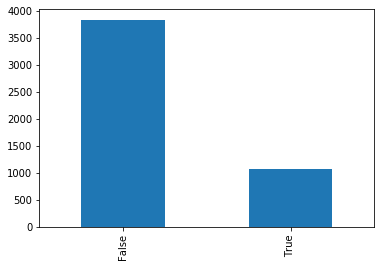

In [2]:
d["recommend"].value_counts().plot(kind="bar")
print("Total data points: ",len(d))
print("Percentage of individual target class:\n",d["recommend"].value_counts()/len(d)*100)

We observe that 'False' is the majority class here, that is target labels are non-uniformly distributed throughout the dataset with much higher 'False' labels than the 'True' labels.

Now, I will create a random sample (without replacement) from the majority class with various proportions of number of minority class data points and concatenate it with the minority class data points.

In [3]:
dl.np.random.seed(42)
under_sample = dl.undersample(d) # default minority proprtion= 0.5
under_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,7,True
1,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,7,True
2,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,True
3,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,True
4,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,6.9,0.30,0.25,3.3,0.041,26.0,124.0,0.99428,3.18,0.50,9.3,6,False
2116,6.4,0.15,0.40,1.3,0.053,61.0,146.0,0.99112,3.17,0.68,11.0,6,False
2117,6.9,0.29,0.23,8.6,0.056,56.0,215.0,0.99670,3.17,0.44,8.8,5,False
2118,5.0,0.61,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.5,5,False


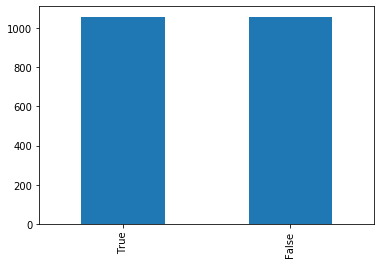

In [4]:
under_sample["recommend"].value_counts().plot(kind="bar")

In [5]:
x_train, x_test, y_train, y_test = dl.PreProcess_and_Split(under_sample)

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.4,
            train_size=None)


In [6]:
dl.np.random.seed(42)
minority_proportion = [0.5, 0.33, 0.25]
test_size = [0.4, 0.3, 0.2]
for m in minority_proportion:
    for t in test_size:
        print('Undersampled data with minority proportion:', m, 'and Random Forest Classification model')
        print('Test data ratio:', t)
        under_sample = dl.undersample(d, m)
        x_train, x_test, y_train, y_test = dl.PreProcess_and_Split(under_sample, t)
        undersampled_y_pred = mev.RFC(x_train, x_test, y_train) #predicted target values
        mev.Performance_Eval(y_test, undersampled_y_pred) 
        print('\n-------------------------------------------------------------')

Undersampled data with minority proportion: 0.5 and Random Forest Classification model
Test data ratio: 0.4
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.4,
            train_size=None)
Confusion matrix:
[[341  83]
 [ 72 352]]



Accuracy Score:
81.72169811320755 %



Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.80      0.81       424
        True       0.81      0.83      0.82       424

    accuracy                           0.82       848
   macro avg       0.82      0.82      0.82       848
weighted avg       0.82      0.82      0.82       848


-------------------------------------------------------------
Undersampled data with minority proportion: 0.5 and Random Forest Classification model
Test data ratio: 0.3
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.3,
            train_size=None)
Confusion matrix:
[[265  53]
 [ 57 261]]



Accuracy Score:
82.70440251572327 %



Classification 

In [7]:
undersampled_y_pred = mev.RFC(x_train, x_test, y_train) #predicted target values
mev.Performance_Eval(y_test, undersampled_y_pred) 

Confusion matrix:
[[ 14  33]
 [  4 420]]



Accuracy Score:
92.1443736730361 %



Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.30      0.43        47
        True       0.93      0.99      0.96       424

    accuracy                           0.92       471
   macro avg       0.85      0.64      0.69       471
weighted avg       0.91      0.92      0.91       471



Here, the undersampling has been performed without replacement to avoid the training of model on same data points again and again which could result in biased accuracy.